# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


Bad key "text.kerning_factor" on line 4 in
/Users/luminda/opt/anaconda3/envs/pythondata/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


## Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

631


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
lat = []
lng=[]
temp = []
country =[]
cloudiness=[]
date=[]
humidity=[]
maxtemp =[]
windspeed=[]
cities_found=[]

# Loop through the list of cities and perform a request for data on each
for city in cities:
    resp = requests.get(query_url + city)
    
    if ((resp.status_code >199) & (resp.status_code <299) ):
        
        response = resp.json()
        
        #response = requests.get(query_url + city).json()
        print("processing....", response["id"],"-",response["name"])
        temp.append(response['main']["temp"])
        country.append(response['sys']['country'])
        cloudiness.append(response['clouds']['all'])
        date.append(response['dt'])
        humidity.append(response['main']["humidity"])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        maxtemp.append(response['main']['temp_max'])
        windspeed.append(response['wind']['speed'])
        cities_found.append(response["name"])
    else:
        print("city not found")
    


processing.... 1185095 - Teknāf
processing.... 2110227 - Butaritari
processing.... 2122574 - Ola
processing.... 2618795 - Klaksvík
processing.... 2075265 - Busselton
processing.... 3421765 - Nanortalik
processing.... 3833367 - Ushuaia
processing.... 5866583 - Saint Paul Harbor
processing.... 4032243 - Vaini
processing.... 4030556 - Rikitea
processing.... 1154689 - Ko Samui
processing.... 2123814 - Leningradskiy
processing.... 6170031 - Tuktoyaktuk
processing.... 5122534 - Jamestown
processing.... 3366880 - Hermanus
processing.... 3576994 - Cockburn Town
processing.... 2022572 - Khatanga
processing.... 3443061 - Chui
processing.... 6185377 - Yellowknife
city not found
processing.... 2036973 - Heihe
processing.... 3831208 - Qaanaaq
processing.... 2163355 - Hobart
processing.... 2264557 - Ponta do Sol
city not found
processing.... 1006984 - East London
processing.... 2071860 - Esperance
processing.... 5882953 - Aklavik
processing.... 3985710 - Cabo San Lucas
processing.... 866062 - Iskate

processing.... 1803841 - Lianzhou
city not found
processing.... 1626932 - Singaraja
processing.... 218680 - Boende
processing.... 986717 - Kruisfontein
processing.... 157403 - Kilosa
processing.... 485660 - Tsimmerbude
processing.... 2450173 - Taoudenni
processing.... 737021 - Zonguldak
city not found
processing.... 1636308 - Manokwari
processing.... 5861897 - Fairbanks
processing.... 3714710 - Antón
processing.... 2635650 - Torquay
processing.... 2738381 - Lata
processing.... 495767 - Sharanga
processing.... 1337605 - Mahibadhoo
processing.... 2181625 - Te Anau
city not found
processing.... 2522890 - Tortolì
processing.... 3803515 - Caucaguita
processing.... 3647637 - Cabudare
processing.... 88319 - Benghazi
processing.... 2112309 - Katsuura
processing.... 1621313 - Ambulu
processing.... 1040652 - Maputo
processing.... 1485286 - Zelenoborsk
processing.... 2136825 - Isangel
processing.... 2346995 - Biu
processing.... 3625710 - Upata
processing.... 1516048 - Khovd
processing.... 899274 

city not found
processing.... 4593724 - Saint Andrews
processing.... 1801582 - Macheng
processing.... 6113406 - Prince Rupert
processing.... 1142226 - Dawlatabad
processing.... 3171760 - Ozieri
processing.... 1252783 - Yārāda
processing.... 4805404 - Fairmont
processing.... 550452 - Khatukay
city not found
processing.... 6149996 - Smithers
processing.... 5110365 - Broome
processing.... 2335204 - Kano
processing.... 4557109 - Chambersburg
processing.... 1280957 - Jiayuguan City
processing.... 5850554 - Makakilo City
processing.... 1862230 - Hondomachi-hondo
processing.... 3911925 - La Paz
processing.... 376332 - Doka
processing.... 559400 - Gorshechnoye
processing.... 634093 - Tornio
processing.... 1649150 - Bengkulu
processing.... 3414079 - Olafsvik
processing.... 1153555 - Chumphon
processing.... 2013918 - Ust-Maya
processing.... 1106677 - Bambous Virieux
processing.... 2012593 - Zeya
processing.... 1648186 - Bontang
city not found
processing.... 3385077 - Conde
processing.... 2122389

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
cityweather_dict = {
    "City": cities_found,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity":humidity,
    "Lat":lat,
    "Lng":lng,
    "Max Temp":maxtemp,
    "Wind Speed":windspeed
}
cityweather_df = pd.DataFrame(cityweather_dict)
cityweather_df.to_csv(output_data_file)
cityweather_df.count()

City          576
Cloudiness    576
Country       576
Date          576
Humidity      576
Lat           576
Lng           576
Max Temp      576
Wind Speed    576
dtype: int64

In [20]:
cityweather_df.head()
#keep one copy of the duplicatews
cityweather_df.duplicated(keep='first')
#show the data frame
cityweather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Teknāf,50,BD,1586981242,87,20.86,92.31,74.97,3.42
1,Butaritari,96,KI,1586981243,81,3.07,172.79,82.90,17.90
2,Ola,92,RU,1586981243,94,59.58,151.28,20.34,3.47
3,Klaksvík,55,FO,1586981243,80,62.23,-6.59,41.00,19.46
4,Busselton,76,AU,1586981243,62,-33.65,115.33,55.00,6.22
...,...,...,...,...,...,...,...,...,...
571,Jacmel,12,HT,1586981341,66,18.23,-72.53,86.00,11.41
572,Jiangyou,9,CN,1586981342,62,31.77,104.72,61.36,2.84
573,Mukhen,0,RU,1586981342,76,48.10,136.10,35.13,4.32
574,Cullera,75,ES,1586981342,93,39.17,-0.25,61.00,5.82


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

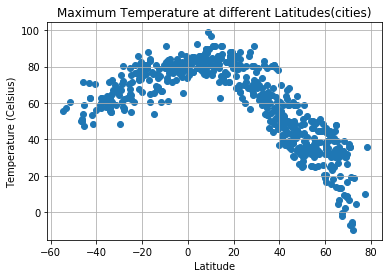

In [21]:
plt.scatter(cityweather_df["Lat"], cityweather_df["Max Temp"], marker="o")
plt.title("Maximum Temperature at different Latitudes(cities)")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("MaxTempVsLat.png")

# Show plot
plt.show()

There is a clear indication that there is an increase in the temperature near the equator. However the highest max. temprature is around +10 degrees.

#### Latitude vs. Humidity Plot

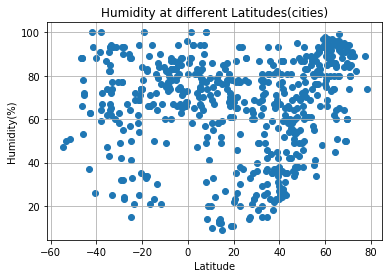

In [22]:
plt.scatter(cityweather_df["Lat"], cityweather_df["Humidity"], marker="o")
plt.title("Humidity at different Latitudes(cities)")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityVsLat.png")

# Show plot
plt.show()

Humidity seems all over the place. There is no apparent correlation with the latitude.

#### Latitude vs. Cloudiness Plot

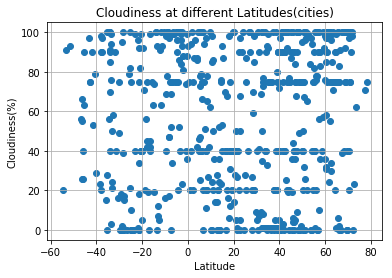

In [23]:
plt.scatter(cityweather_df["Lat"], cityweather_df["Cloudiness"], marker="o")
plt.title("Cloudiness at different Latitudes(cities)")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessVsLat.png")

# Show plot
plt.show()

The cloudiness does not show any significant correlation with the latitude.

#### Latitude vs. Wind Speed Plot

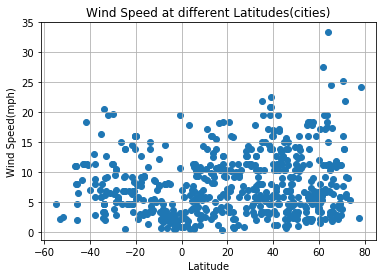

In [24]:
plt.scatter(cityweather_df["Lat"], cityweather_df["Wind Speed"], marker="o")
plt.title("Wind Speed at different Latitudes(cities)")
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeedVsLat.png")

# Show plot
plt.show()

The Wind speed does not show any significant correlation with the latitude.

## Linear Regression

In [25]:
# OPTIONAL: Create a function to create Linear Regression plots
def my_lin_regression(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    return (slope, intercept, rvalue, pvalue, stderr)
    


In [36]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = cityweather_df.loc[cityweather_df["Lat"]>=0]
southern_df = cityweather_df.loc[cityweather_df["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.9007882325437409


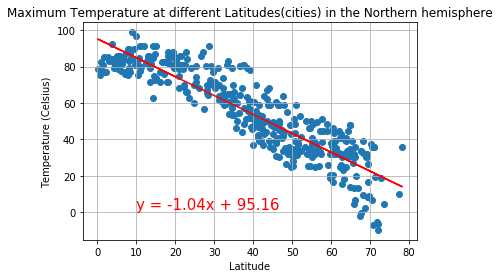

In [37]:
x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]
plt.scatter(x_values,y_values, marker="o")
plt.title("Maximum Temperature at different Latitudes(cities) in the Northern hemisphere")
(slope, intercept, rvalue, pvalue, stderr)=my_lin_regression(x_values,y_values)
line_eqn = x_values * slope + intercept
plt.plot(x_values,line_eqn,"r-")
print(f"The r-squared is: {rvalue}")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
text = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(text,(10,2),fontsize=15,color="red")
plt.grid(True)
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7356176937346928


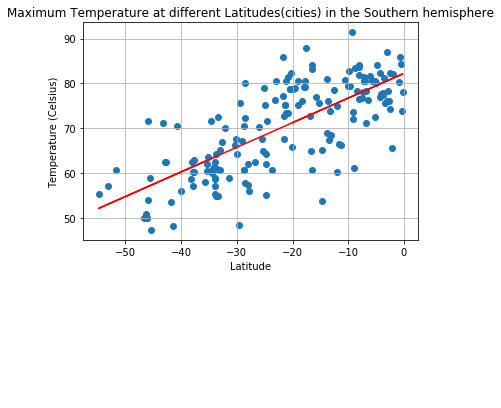

In [35]:
x_values = southern_df["Lat"]
y_values = southern_df["Max Temp"]
plt.scatter(x_values,y_values, marker="o")
plt.title("Maximum Temperature at different Latitudes(cities) in the Southern hemisphere")
(slope, intercept, rvalue, pvalue, stderr)=my_lin_regression(x_values,y_values)
line_eqn = x_values * slope + intercept
plt.plot(x_values,line_eqn,"r-")
print(f"The r-squared is: {rvalue}")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
text = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(text,(-40,10),fontsize=15,color="red")
plt.grid(True)
plt.show()

In both Southern hemisphere and Northern hemisphdetre, there is a strong correlation between the max. temperature and the latitude

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.27747531710401213


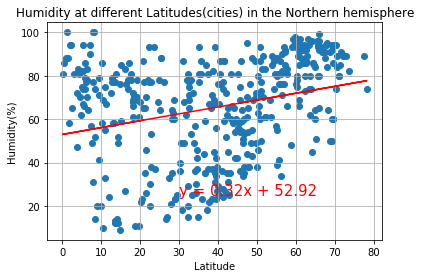

In [29]:
x_values = northern_df["Lat"]
y_values = northern_df["Humidity"]
plt.scatter(x_values,y_values, marker="o")
plt.title("Humidity at different Latitudes(cities) in the Northern hemisphere")
(slope, intercept, rvalue, pvalue, stderr)=my_lin_regression(x_values,y_values)
line_eqn = x_values * slope + intercept
plt.plot(x_values,line_eqn,"r-")
print(f"The r-squared is: {rvalue}")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
text = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(text,(30,25),fontsize=15,color="red")
plt.grid(True)
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.13918037374061892


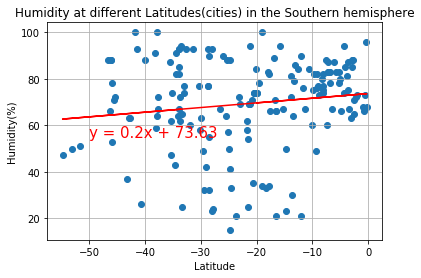

In [30]:
x_values = southern_df["Lat"]
y_values = southern_df["Humidity"]
plt.scatter(x_values,y_values, marker="o")
plt.title("Humidity at different Latitudes(cities) in the Southern hemisphere")
(slope, intercept, rvalue, pvalue, stderr)=my_lin_regression(x_values,y_values)
line_eqn = x_values * slope + intercept
plt.plot(x_values,line_eqn,"r-")
print(f"The r-squared is: {rvalue}")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
text = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(text,(-50,55),fontsize=15,color="red")
plt.grid(True)
plt.show()

There is no significant correlation between the humidity and the latitude

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1737854949590991


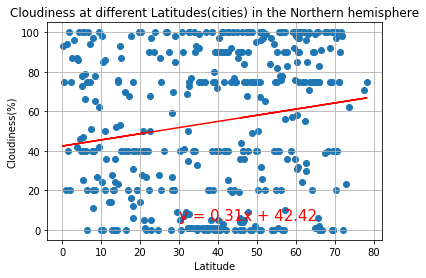

In [31]:
x_values = northern_df["Lat"]
y_values = northern_df["Cloudiness"]
plt.scatter(x_values,y_values, marker="o")
plt.title("Cloudiness at different Latitudes(cities) in the Northern hemisphere")
(slope, intercept, rvalue, pvalue, stderr)=my_lin_regression(x_values,y_values)
line_eqn = x_values * slope + intercept
plt.plot(x_values,line_eqn,"r-")
print(f"The r-squared is: {rvalue}")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
text = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(text,(30,5),fontsize=15,color="red")
plt.grid(True)
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.14565236219876607


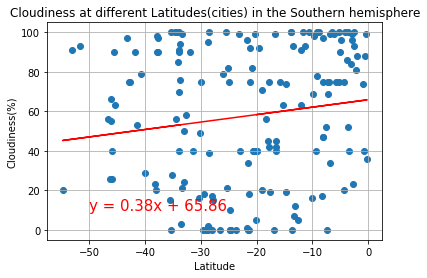

In [32]:
x_values = southern_df["Lat"]
y_values = southern_df["Cloudiness"]
plt.scatter(x_values,y_values, marker="o")
plt.title("Cloudiness at different Latitudes(cities) in the Southern hemisphere")
(slope, intercept, rvalue, pvalue, stderr)=my_lin_regression(x_values,y_values)
line_eqn = x_values * slope + intercept
plt.plot(x_values,line_eqn,"r-")
print(f"The r-squared is: {rvalue}")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
text = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(text,(-50,10),fontsize=15,color="red")
plt.grid(True)
plt.show()

There is no significant correlation between the cloudiness and the latitude

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1196381501235211


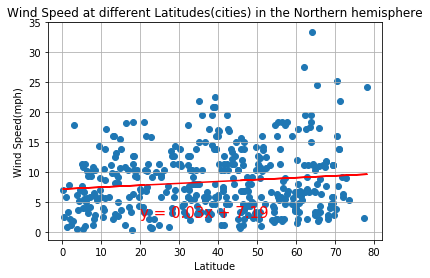

In [33]:
x_values = northern_df["Lat"]
y_values = northern_df["Wind Speed"]
plt.scatter(x_values,y_values, marker="o")
plt.title("Wind Speed at different Latitudes(cities) in the Northern hemisphere")
(slope, intercept, rvalue, pvalue, stderr)=my_lin_regression(x_values,y_values)
line_eqn = x_values * slope + intercept
plt.plot(x_values,line_eqn,"r-")
print(f"The r-squared is: {rvalue}")
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
text = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(text,(20,2.5),fontsize=15,color="red")
plt.grid(True)
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.2957852808656217


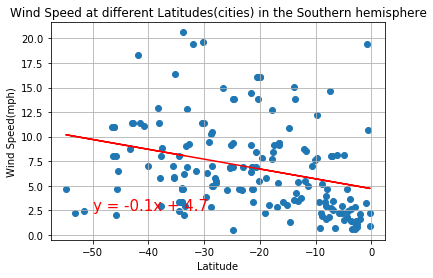

In [34]:
x_values = southern_df["Lat"]
y_values = southern_df["Wind Speed"]
plt.scatter(x_values,y_values, marker="o")
plt.title("Wind Speed at different Latitudes(cities) in the Southern hemisphere")
(slope, intercept, rvalue, pvalue, stderr)=my_lin_regression(x_values,y_values)
line_eqn = x_values * slope + intercept
plt.plot(x_values,line_eqn,"r-")
print(f"The r-squared is: {rvalue}")
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
text = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(text,(-50,2.5),fontsize=15,color="red")
plt.grid(True)
plt.show()

There is no significant correlation between the wind speed and the latitude